In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv('sales_data_with_discounts.csv')

In [3]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
df.shape

(450, 13)

In [5]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [9]:
df.describe(include=object)

,Date,Day,SKU,City,BU,Brand,Model
count,450,450,450,450,450,450,450
unique,15,7,30,1,3,9,30
top,01-04-2021,Thursday,M01,C,Mobiles,Jeera,RU-10
freq,30,90,15,450,150,90,15


In [10]:
df['Day'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [11]:
df['City'].unique()

array(['C'], dtype=object)

In [12]:
df.drop(columns='City',inplace=True)

In [13]:
df

,Date,Day,SKU,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


 # Analytics for Columns

In [14]:
df['Date'].mode()

0     01-04-2021
1     02-04-2021
2     03-04-2021
3     04-04-2021
4     05-04-2021
5     06-04-2021
6     07-04-2021
7     08-04-2021
8     09-04-2021
9     10-04-2021
10    11-04-2021
11    12-04-2021
12    13-04-2021
13    14-04-2021
14    15-04-2021
Name: Date, dtype: object

In [15]:
df.Day.mode()

0    Thursday
Name: Day, dtype: object

In [16]:
df.SKU.mode()

0     F01
1     F02
2     F03
3     F04
4     F05
5     F06
6     F07
7     F08
8     F09
9     F10
10    L01
11    L02
12    L03
13    L04
14    L05
15    L06
16    L07
17    L08
18    L09
19    L10
20    M01
21    M02
22    M03
23    M04
24    M05
25    M06
26    M07
27    M08
28    M09
29    M10
Name: SKU, dtype: object

In [17]:
df.Volume.mean(),df.Volume.std()

(5.066666666666666, 4.231602391213926)

In [18]:
df.BU.mode()

0         FMCG
1    Lifestyle
2      Mobiles
Name: BU, dtype: object

In [19]:
df.Brand.mode()

0    Jeera
Name: Brand, dtype: object

In [20]:
df.Model.mode()

0       Babaji Cream
1        Babaji Oil 
2     Babaji Shampoo
3      Gear BB Cream
4         Gear Cream
5           Gear Oil
6       Gear Shampoo
7          M- Inners
8        M- T Shirts
9          M-Casuals
10         M-Formals
11           M-Jeans
12           M-Shoes
13              O-10
14              O-11
15             RU-10
16              RU-9
17         RU-9 Plus
18              S-20
19              S-21
20       Vedic Cream
21         Vedic Oil
22     Vedic Shampoo
23         W-Casuals
24          W-Inners
25          W-Lounge
26         W-Western
27            YM-98 
28             YM-99
29        YM-99 Plus
Name: Model, dtype: object

In [21]:
df['Avg Price'].mean() , df['Avg Price'].std()

(10453.433333333332, 18079.90483993645)

In [22]:
df['Total Sales Value'].mean() , df['Total Sales Value'].std()

(33812.83555555555, 50535.07417255328)

In [23]:
df['Discount Rate (%)'].mean() , df['Discount Rate (%)'].std()

(15.155241895330914, 4.220602153325511)

In [24]:
df['Discount Amount'].mean() , df['Discount Amount'].std()

(3346.499424342415, 4509.9029633539985)

In [25]:
df['Net Sales Value'].mean() , df['Net Sales Value'].std()

(30466.336131270138, 46358.656624066934)

# Data Visualization

In [26]:
plt.rcParams['figure.figsize']=(10,9)
plt.rcParams['figure.dpi']=720
%matplotlib inline

array([[<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Avg Price'}>],
       [<Axes: title={'center': 'Total Sales Value'}>,
        <Axes: title={'center': 'Discount Rate (%)'}>],
       [<Axes: title={'center': 'Discount Amount'}>,
        <Axes: title={'center': 'Net Sales Value'}>]], dtype=object)

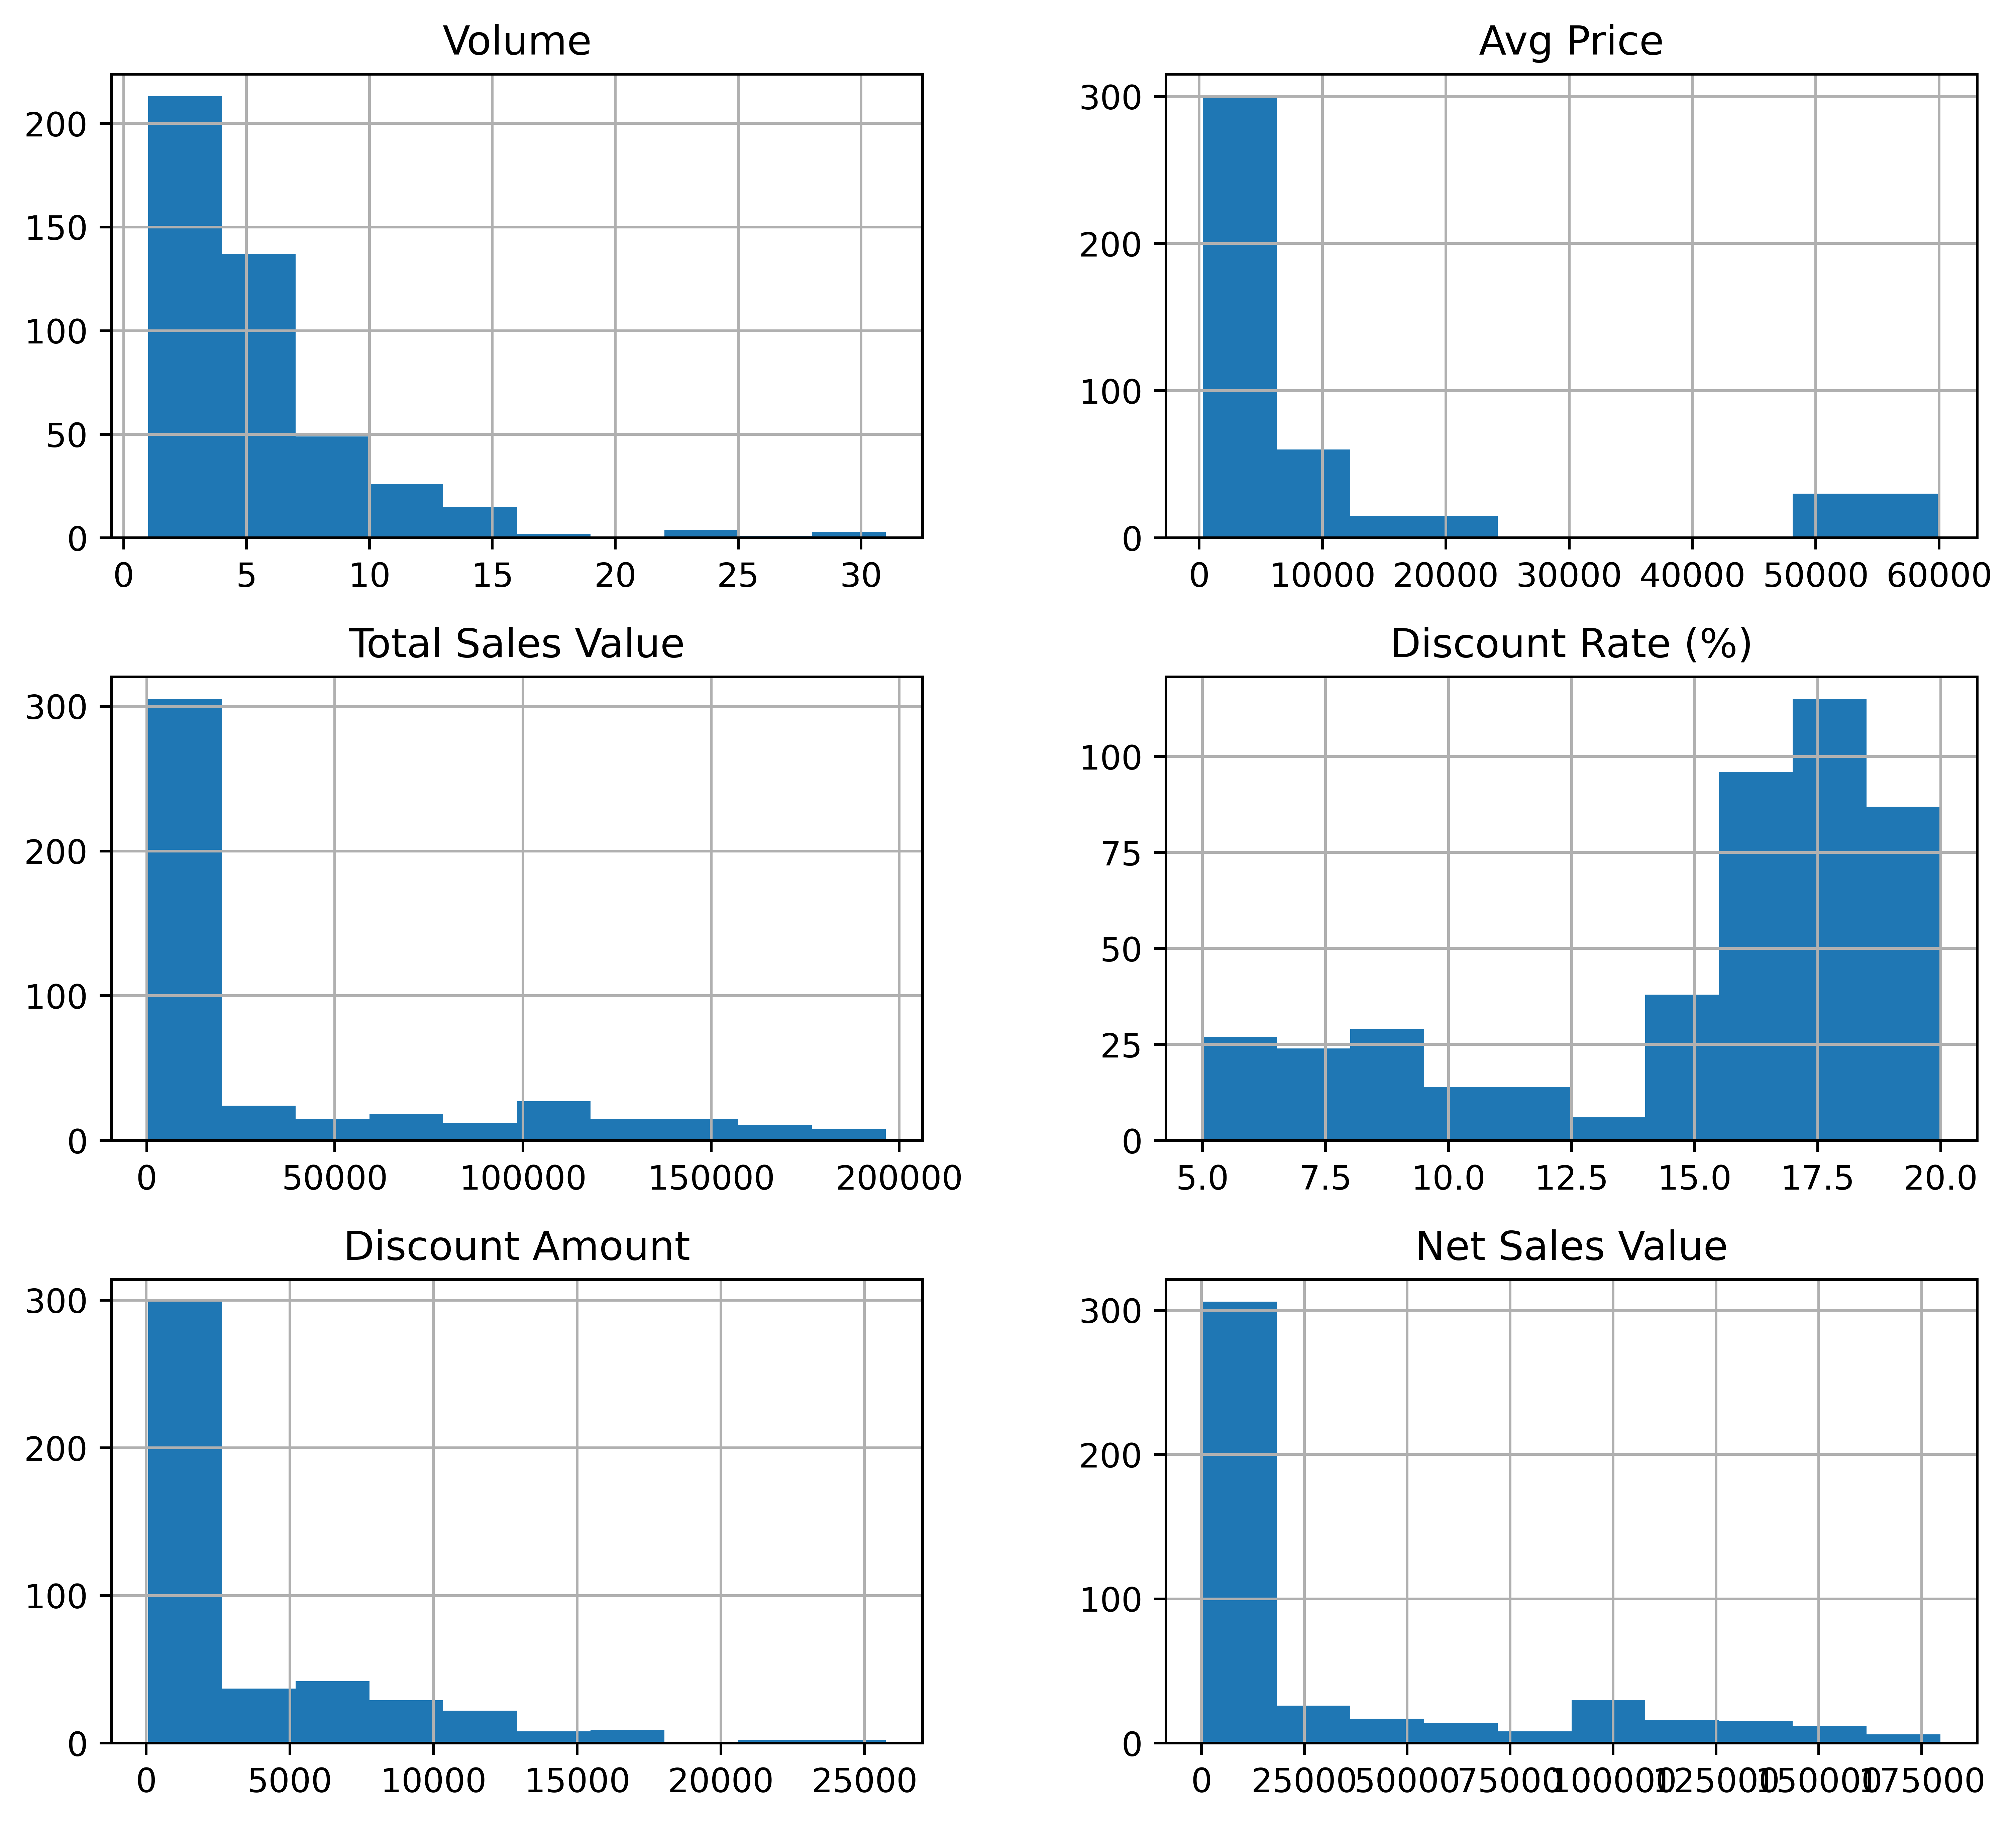

In [27]:
df.hist()

<Axes: >

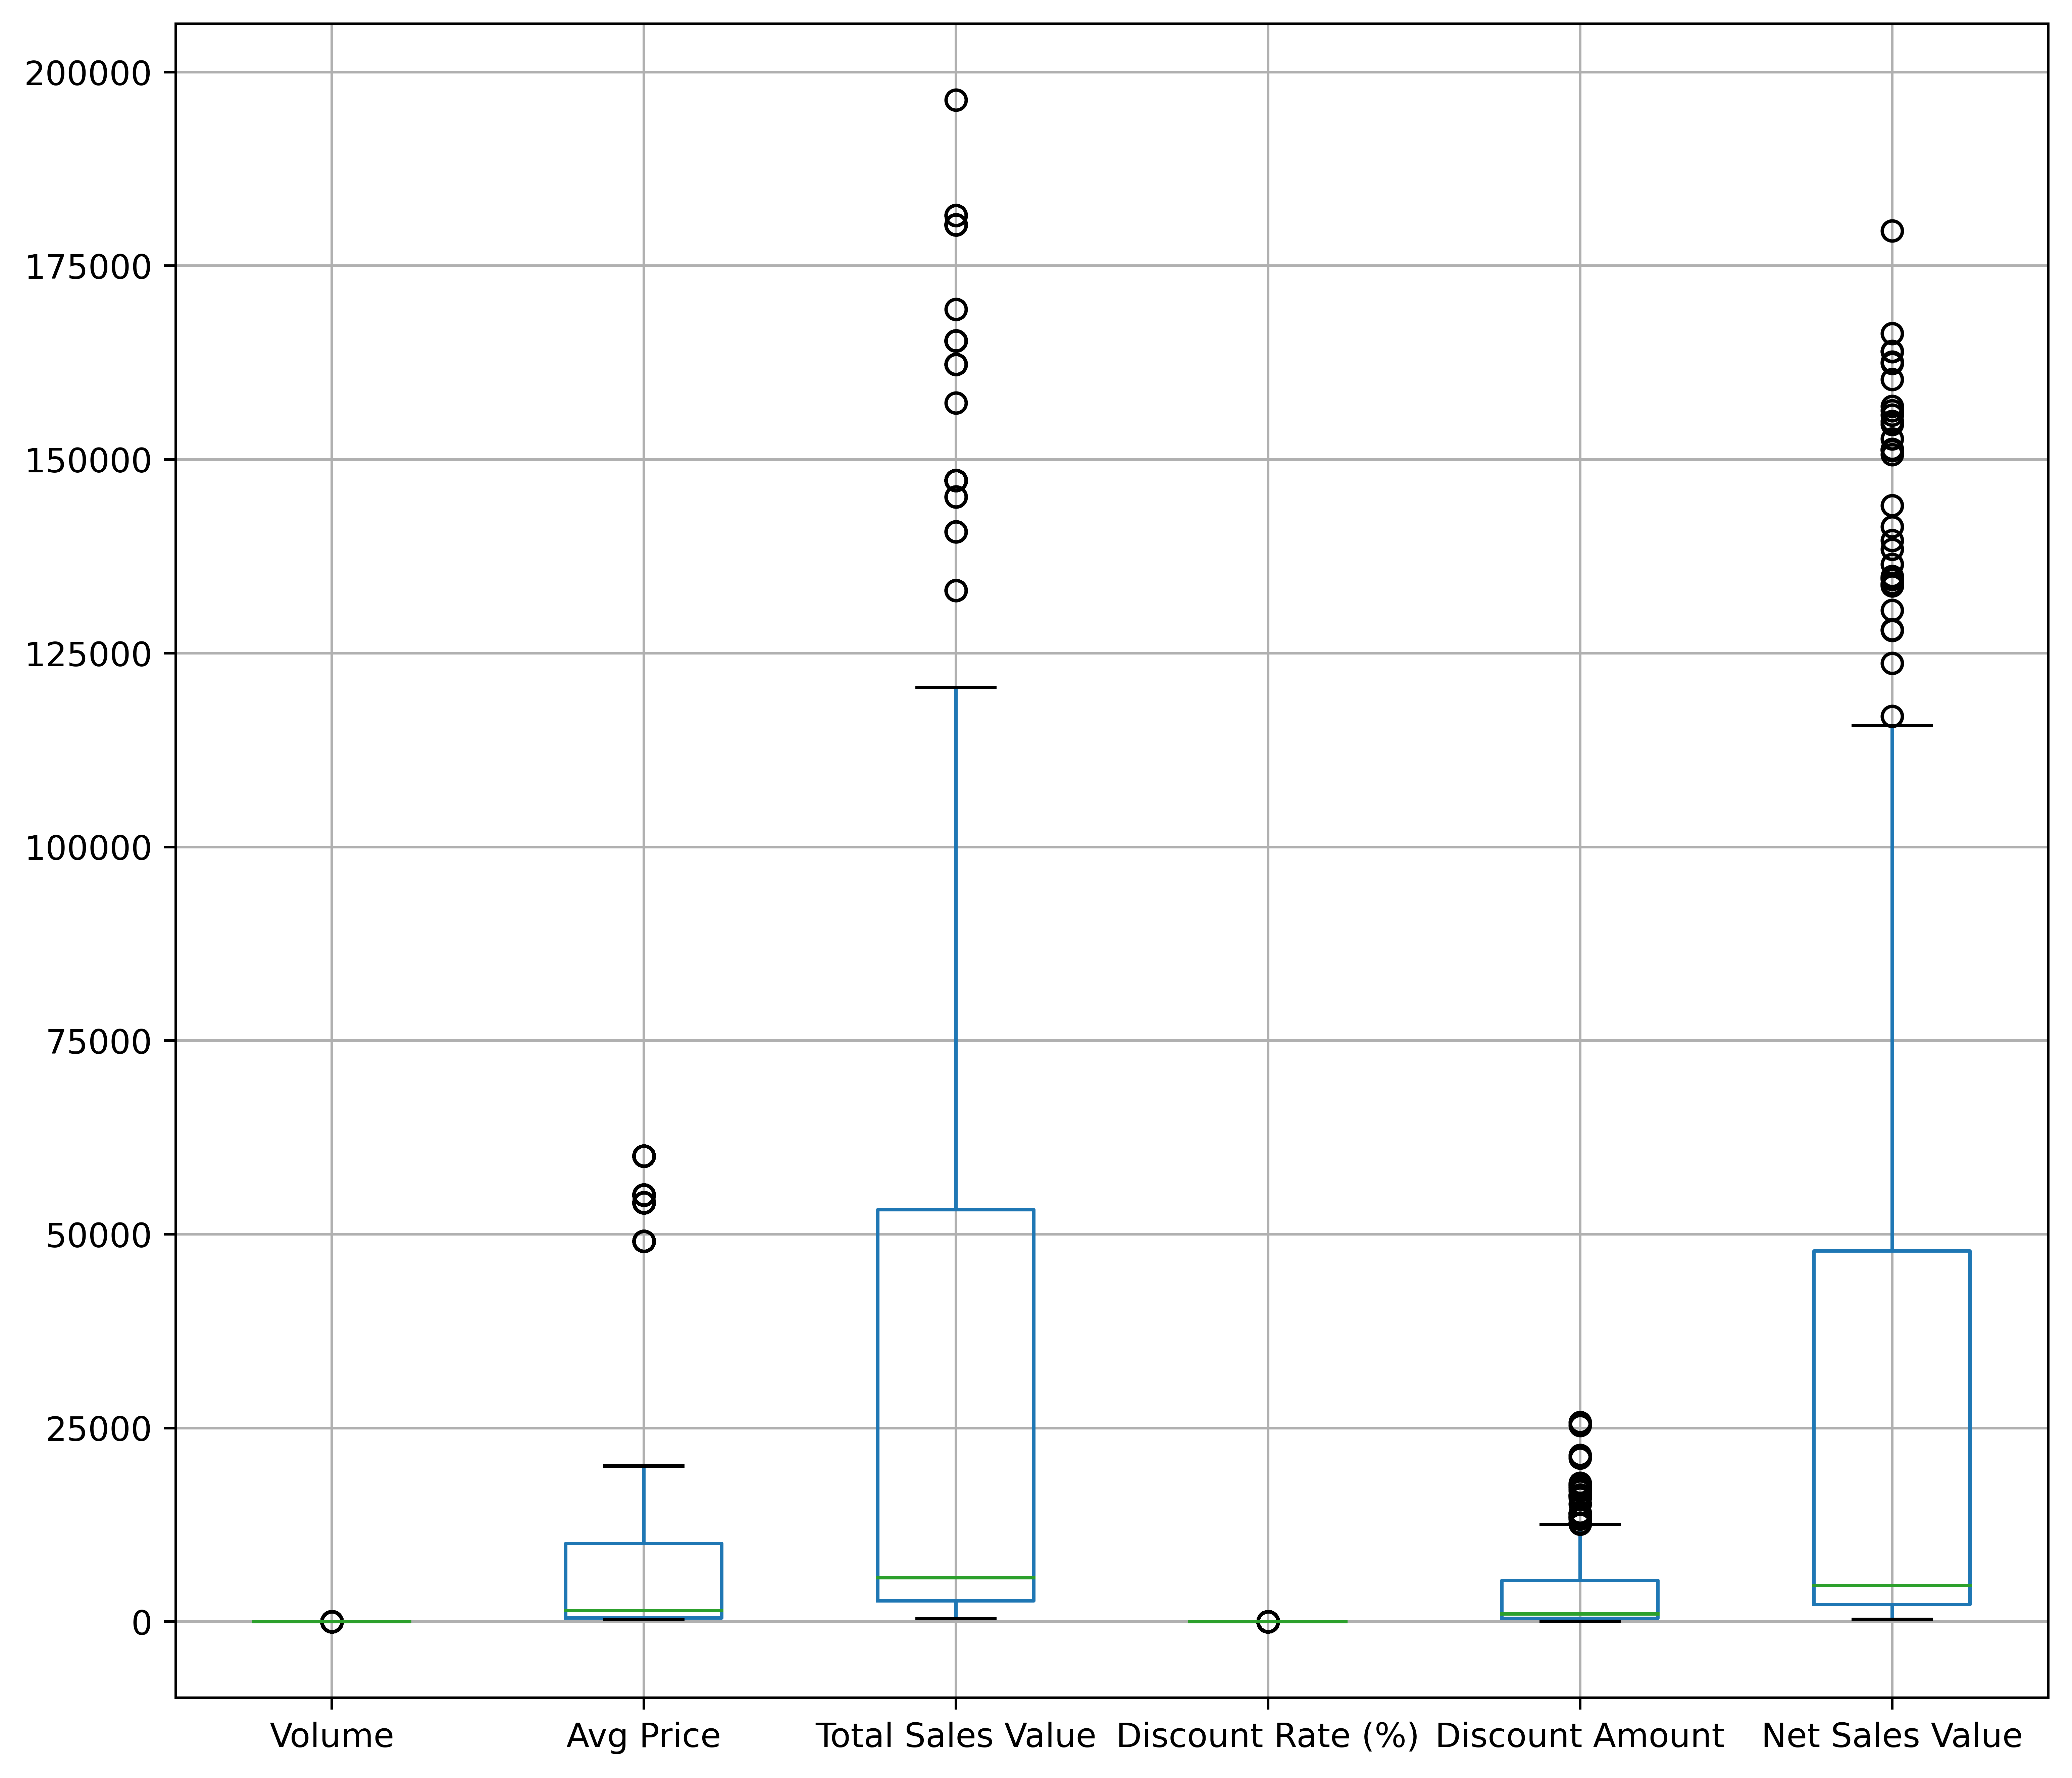

In [28]:
df.boxplot()

<BarContainer object of 450 artists>

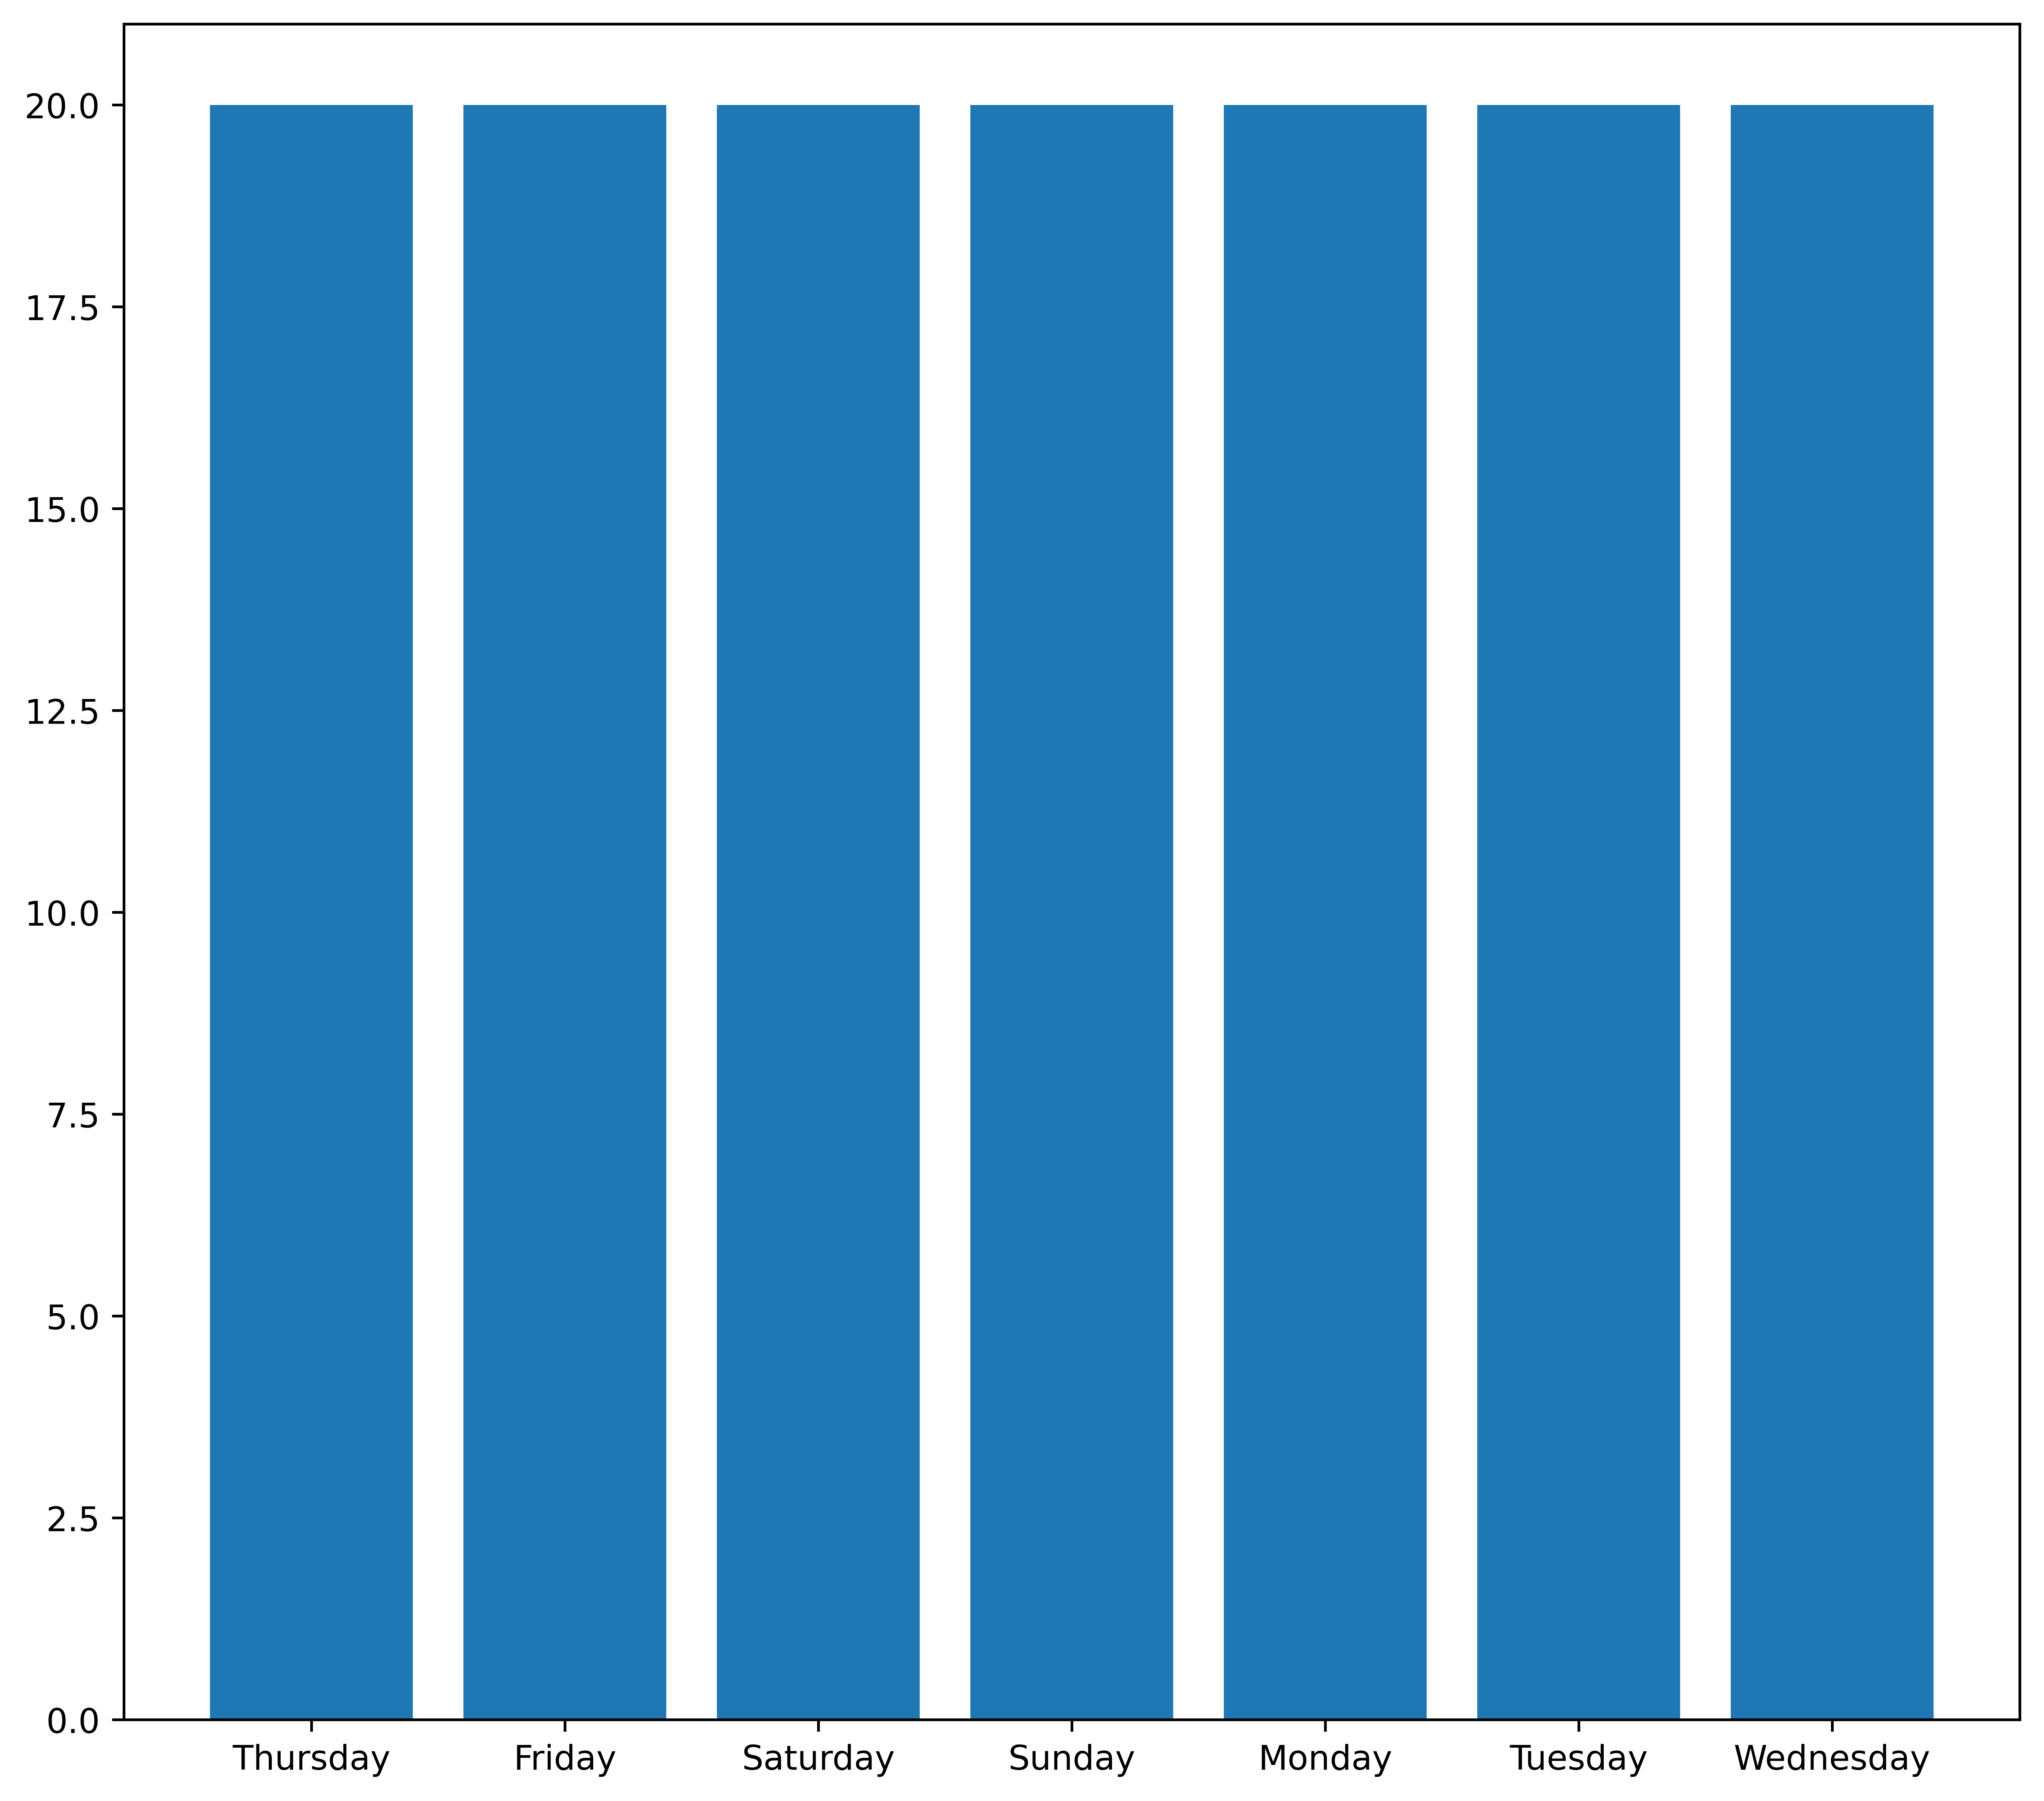

In [29]:
plt.bar(df.Day,height=20)

<BarContainer object of 450 artists>

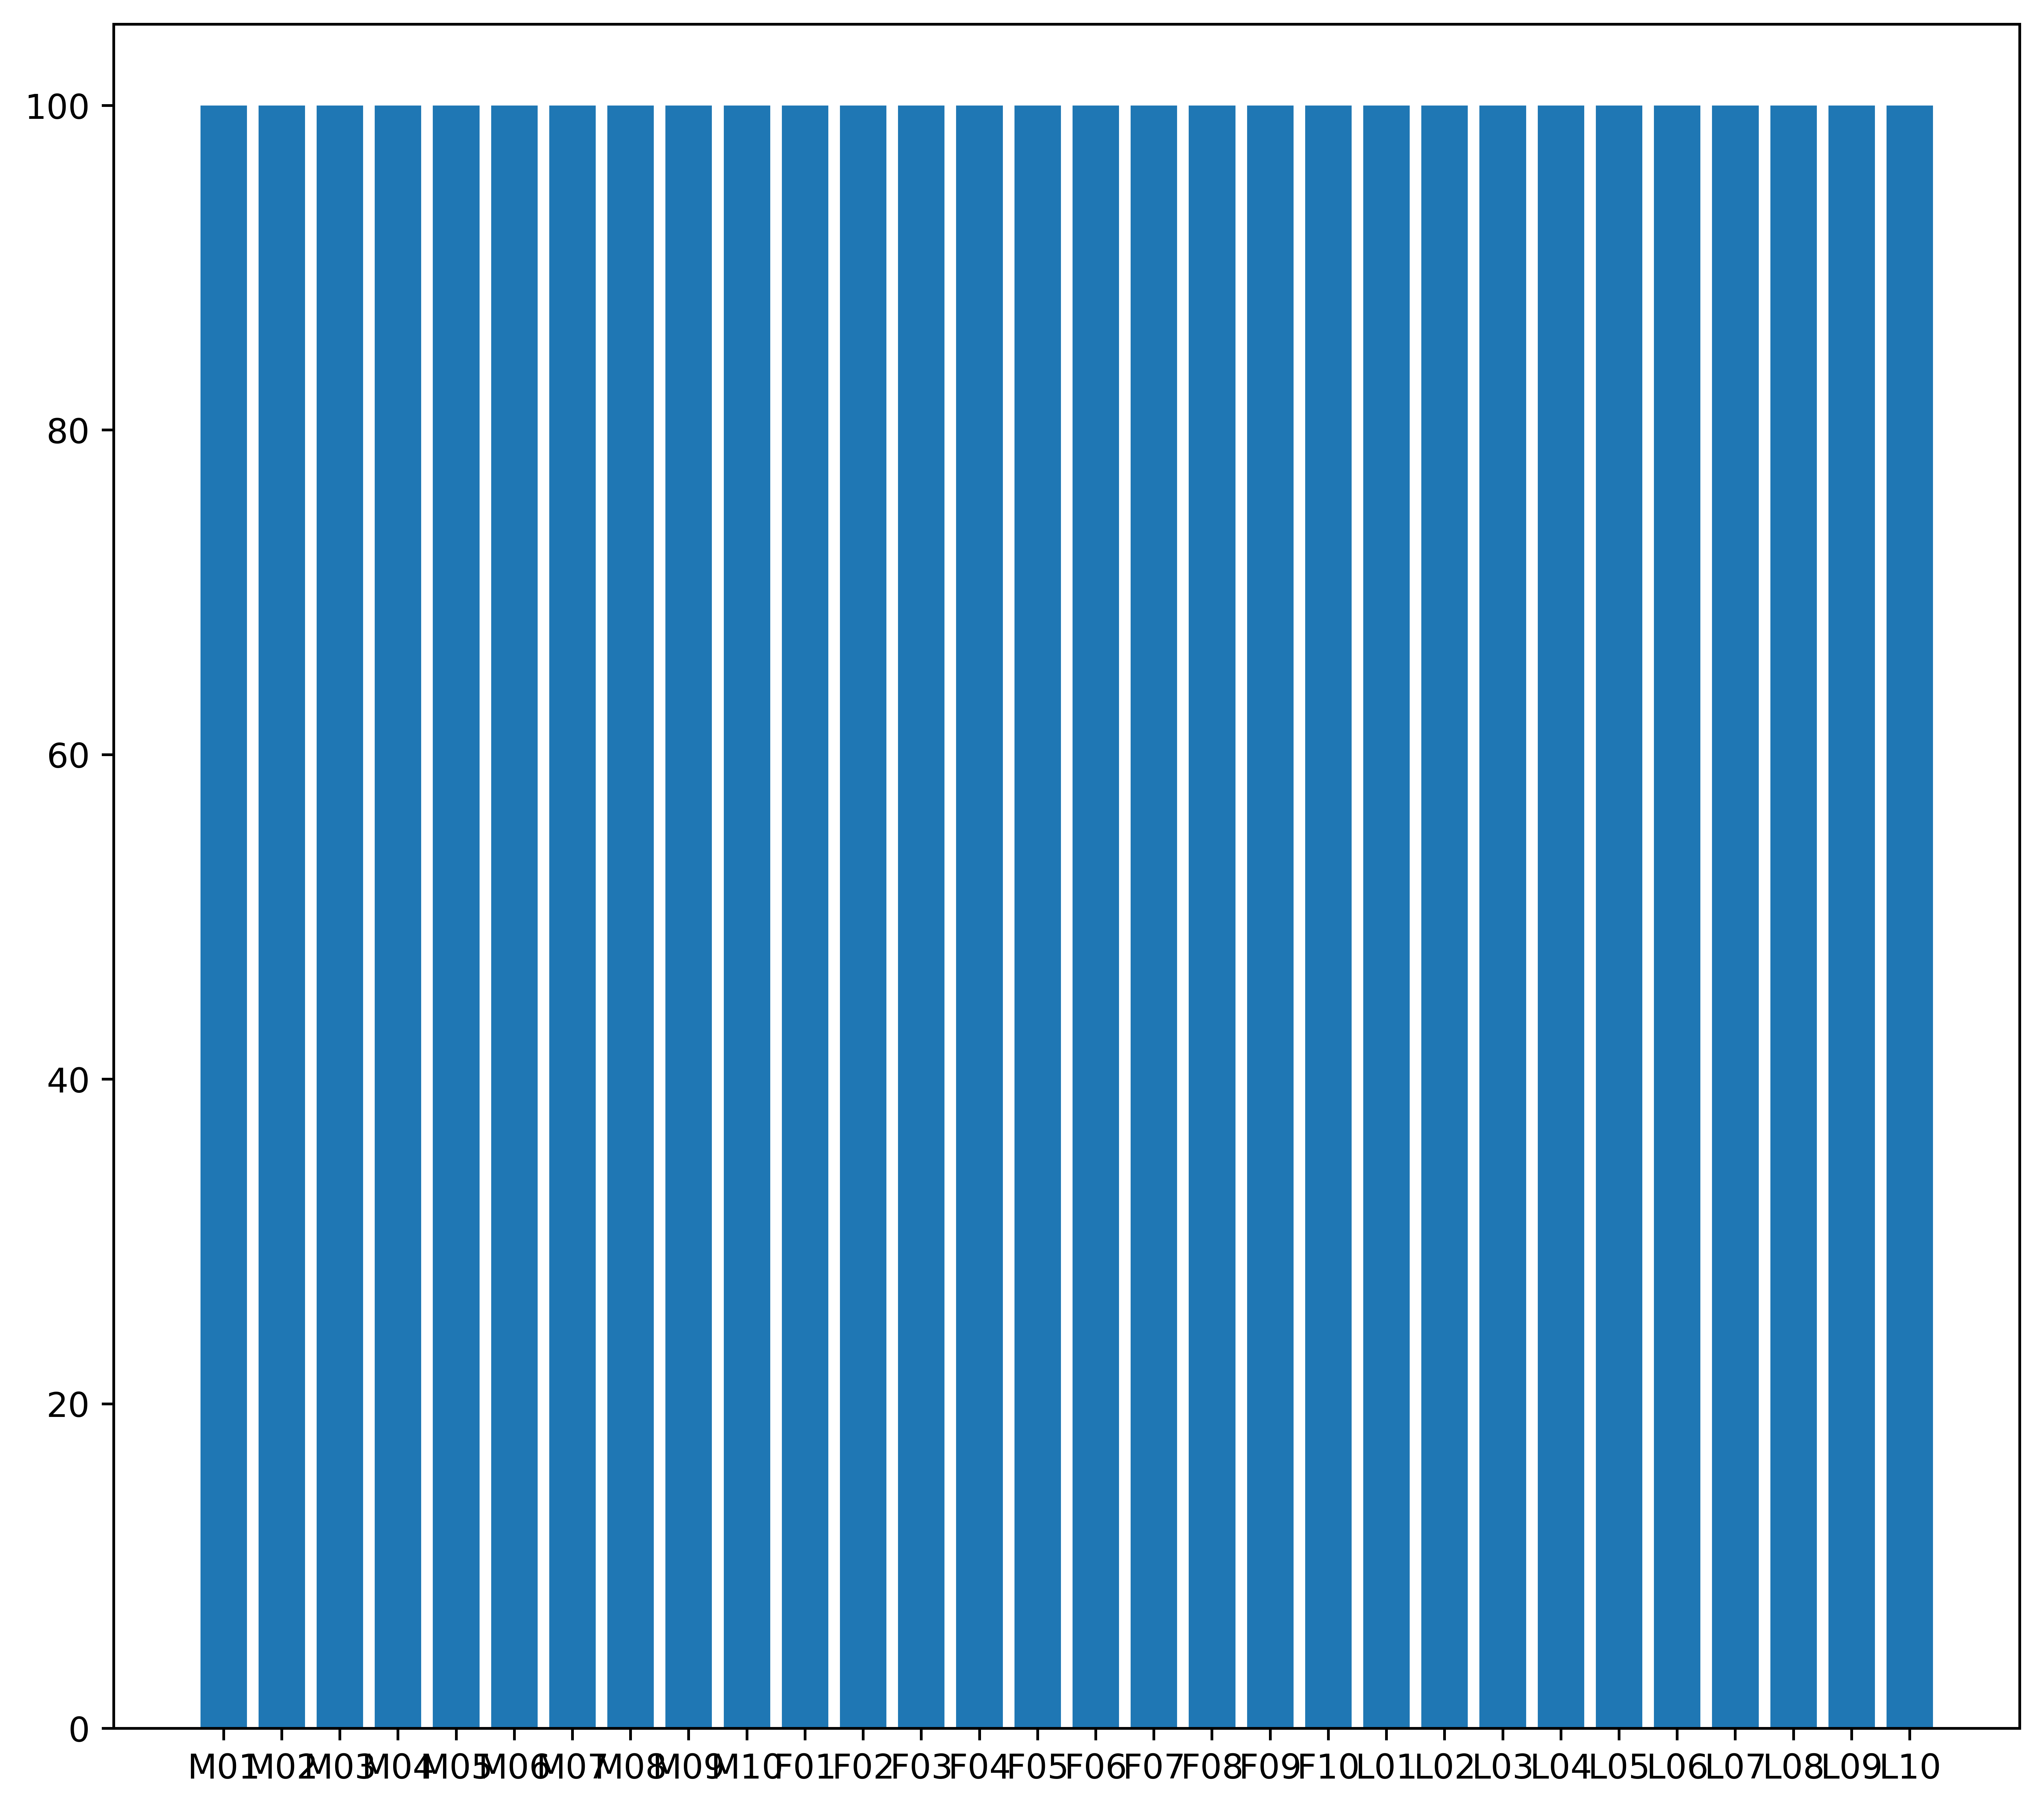

In [30]:
plt.bar(df.SKU,height=100)

In [31]:
# conversion of categorical columns into numerical columns
# it will helpful for performing machine learning algorithm.

In [32]:
df_dummie=pd.get_dummies(df).astype(int)

In [33]:
df_dummie

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11,21153,160346,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11,11676,89323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9,10657,102042,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6,8364,112235,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17,4372,19927,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15,402,2197,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,6,2600,15600,17,2660,12939,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,2,1600,3200,18,606,2593,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,3,1900,5700,16,957,4742,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Standardization of Numerical Variables direct way

In [35]:
(df_dummie-df_dummie.mean())/df_dummie.std()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.347417,0.091072,2.922469,-0.870199,3.948416,2.801638,3.737498,-0.266964,-0.266964,-0.266964,...,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489
1,1.165831,-0.019548,1.329516,-0.870199,1.847045,1.269605,3.737498,-0.266964,-0.266964,-0.266964,...,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489
2,0.456880,0.312312,1.561038,-1.346875,1.621098,1.543966,3.737498,-0.266964,-0.266964,-0.266964,...,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,5.379178,-0.185489
3,0.220563,0.533552,1.717365,-2.061890,1.112662,1.763838,3.737498,-0.266964,-0.266964,-0.266964,...,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,5.379178
4,-0.488389,-0.130168,-0.188242,0.559830,0.227501,-0.227333,3.737498,-0.266964,-0.266964,-0.266964,...,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,5.379178,-0.185489,-0.185489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.083154,-0.652782,-0.609786,-0.266964,-0.266964,-0.266964,-0.266964,...,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489
446,0.220563,-0.434374,-0.360400,0.559830,-0.152107,-0.378071,-0.266964,-0.266964,-0.266964,-0.266964,...,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,5.379178,-0.185489,-0.185489,-0.185489
447,-0.724706,-0.489684,-0.605774,0.798168,-0.607548,-0.601244,-0.266964,-0.266964,-0.266964,-0.266964,...,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,5.379178,-0.185489,-0.185489,-0.185489,-0.185489
448,-0.488389,-0.473091,-0.556303,0.321492,-0.529720,-0.554888,-0.266964,-0.266964,-0.266964,-0.266964,...,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489,-0.185489


In [36]:
# Standardization of Numerical Variables another way

In [37]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [38]:
df_num=df.iloc[:,[3,7,8,9,10,11]]

In [39]:
df_num

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [40]:
df_stand=(df_num-df_num.mean())/df_num.std()

In [41]:
df_stand

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


In [42]:
df_dummie2=df_dummie.iloc[:,6:]

In [43]:
df_dummie2

,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_final=df_stand.join(df_dummie2)

In [45]:
df_final

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
